# EDA: Credit Card Default Prediction
This notebook performs exploratory data analysis (EDA) on the credit card default dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
# Load dataset
df = pd.read_csv("default_of_credit_card_clients.csv")

# Preview the data
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# Shape and basic info
print("Shape of dataset:", df.shape)
df.info()


Shape of dataset: (30000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   300

In [4]:
# Rename target column for ease
df.rename(columns={'default payment next month': 'default'}, inplace=True)
df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [10]:
# Check for missing values
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [11]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


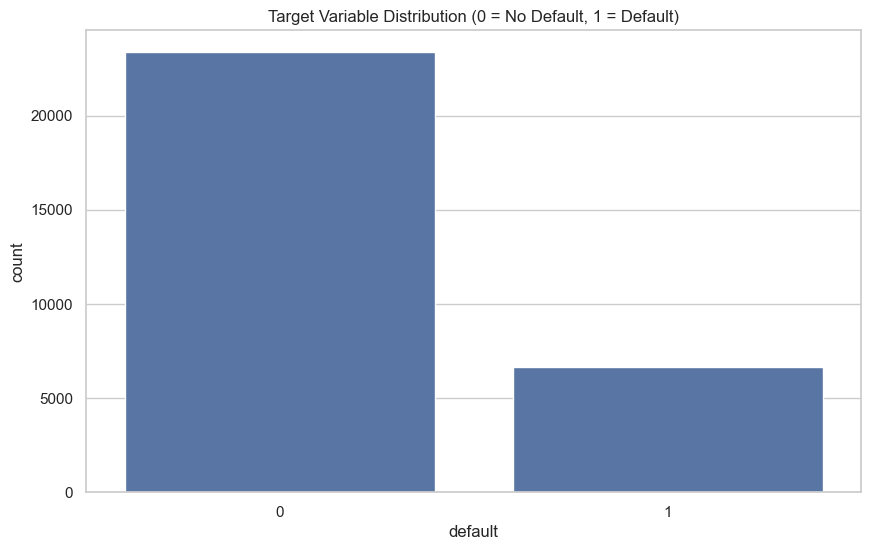

default
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [6]:
# Distribution of the target variable
sns.countplot(data=df, x='default')
plt.title("Target Variable Distribution (0 = No Default, 1 = Default)")
plt.show()

# Show class ratio
df['default'].value_counts(normalize=True)


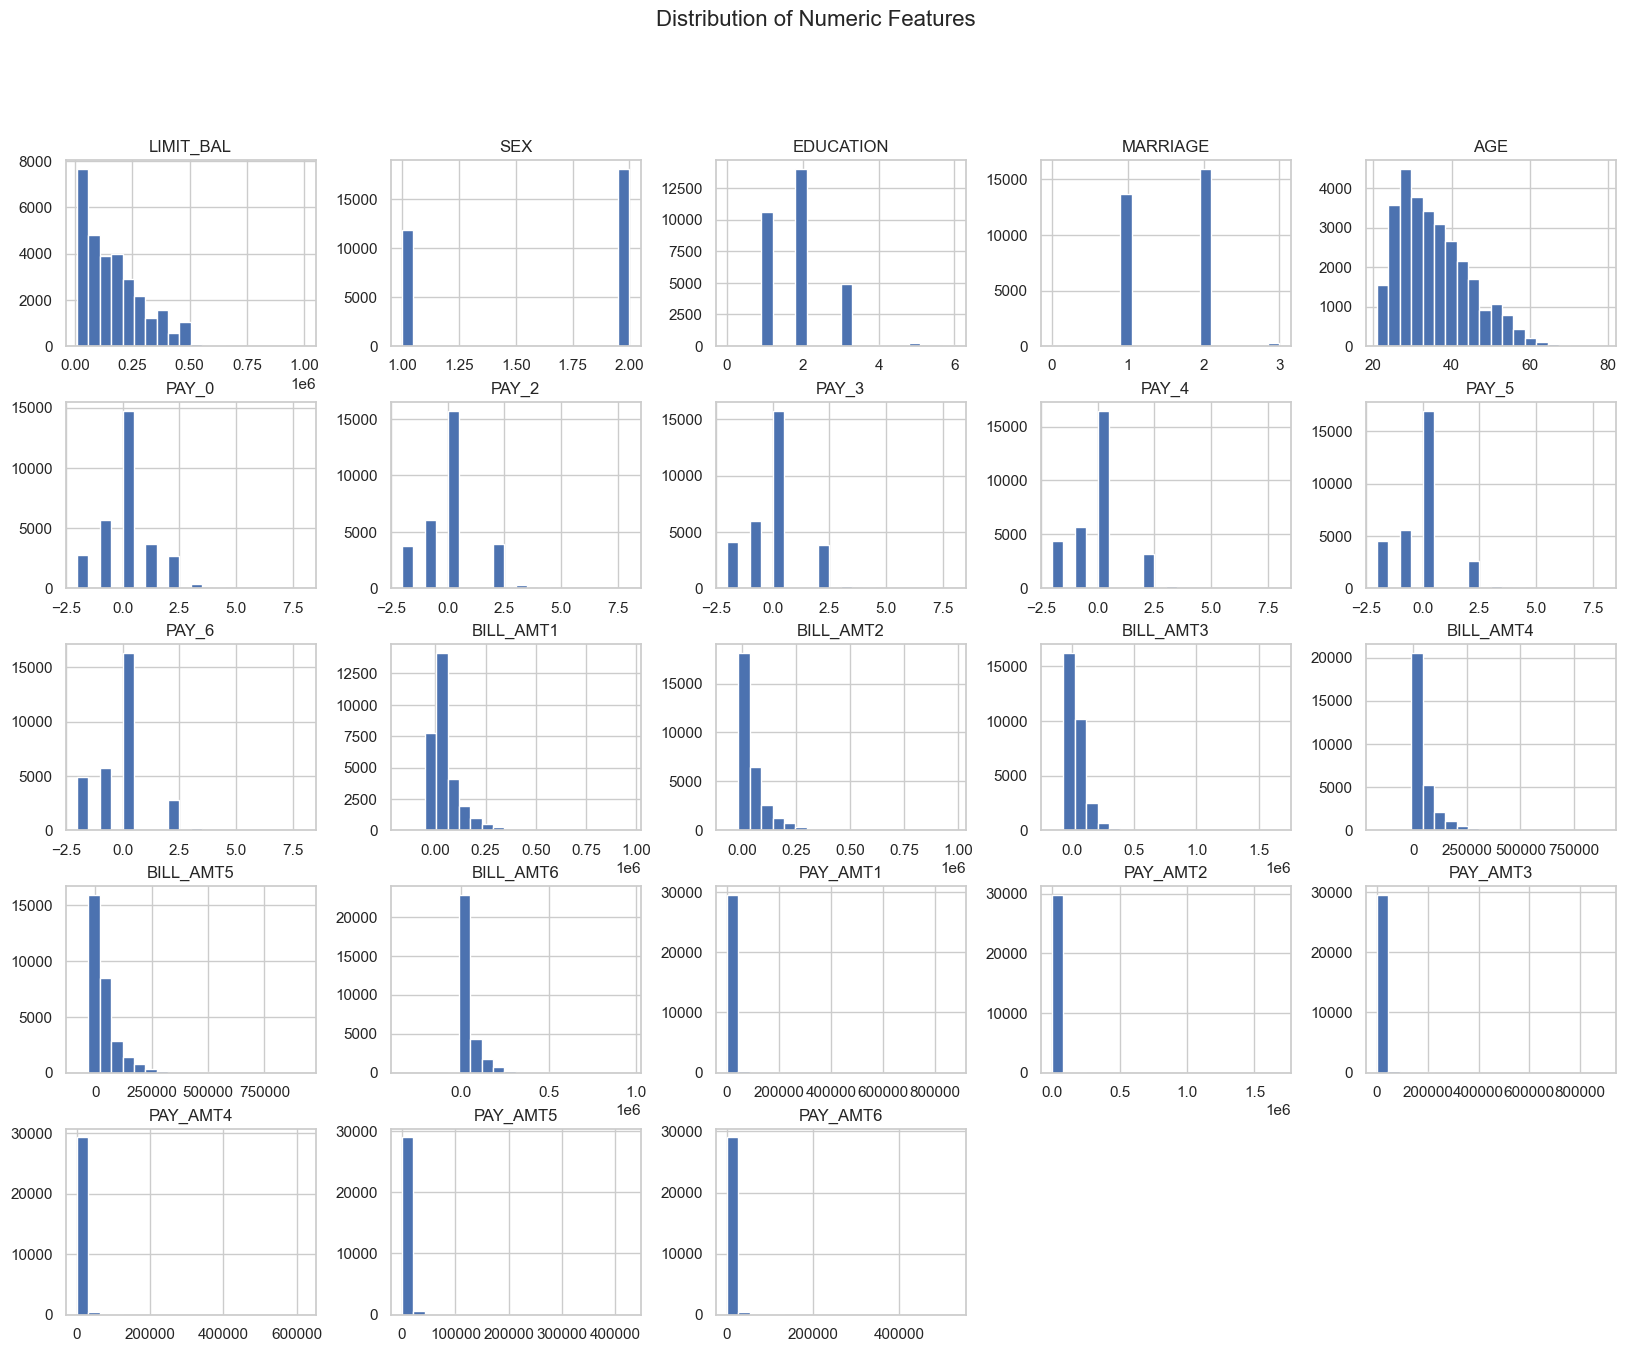

In [7]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['ID', 'default'])
df[numeric_cols].hist(bins=20, figsize=(20, 15))
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()


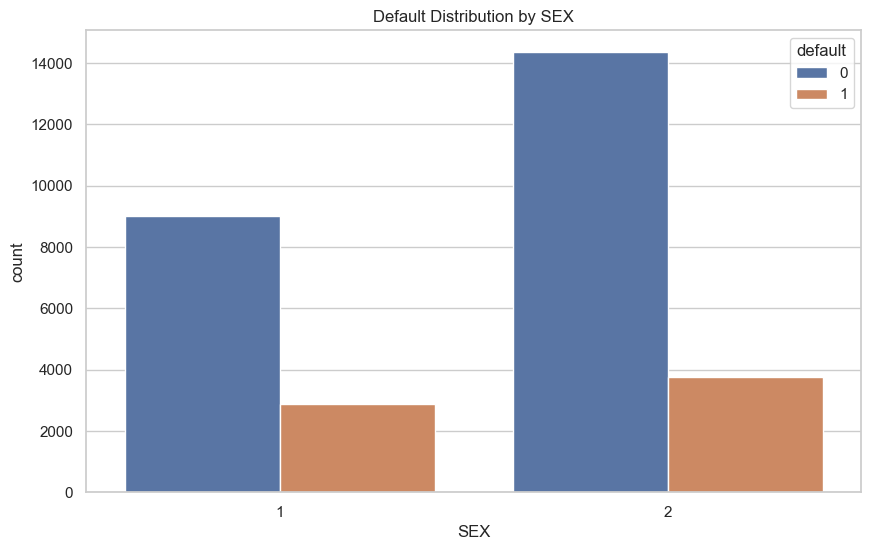

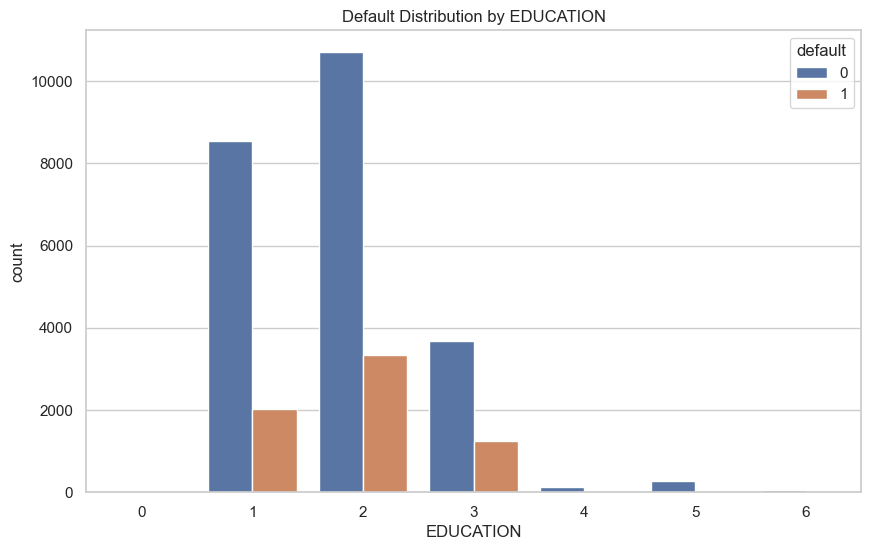

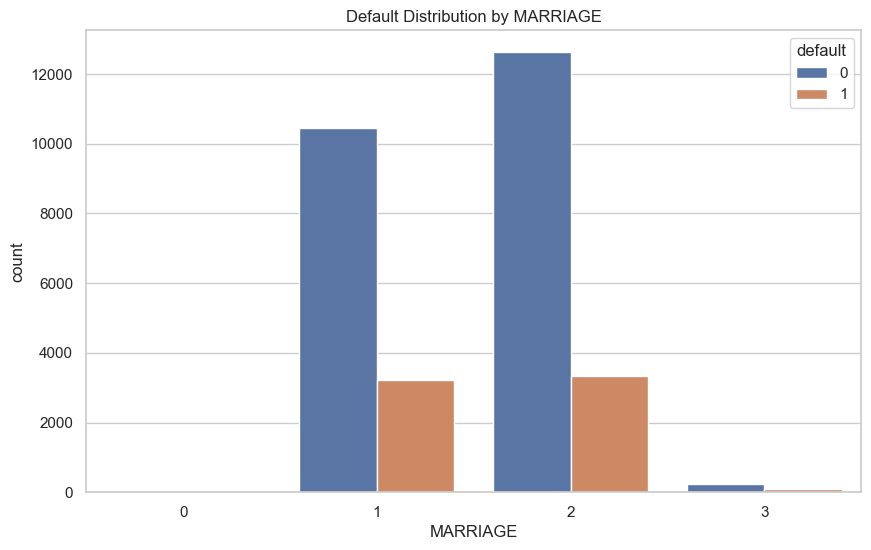

In [8]:
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
for col in categorical_cols:
    sns.countplot(data=df, x=col, hue='default')
    plt.title(f"Default Distribution by {col}")
    plt.show()


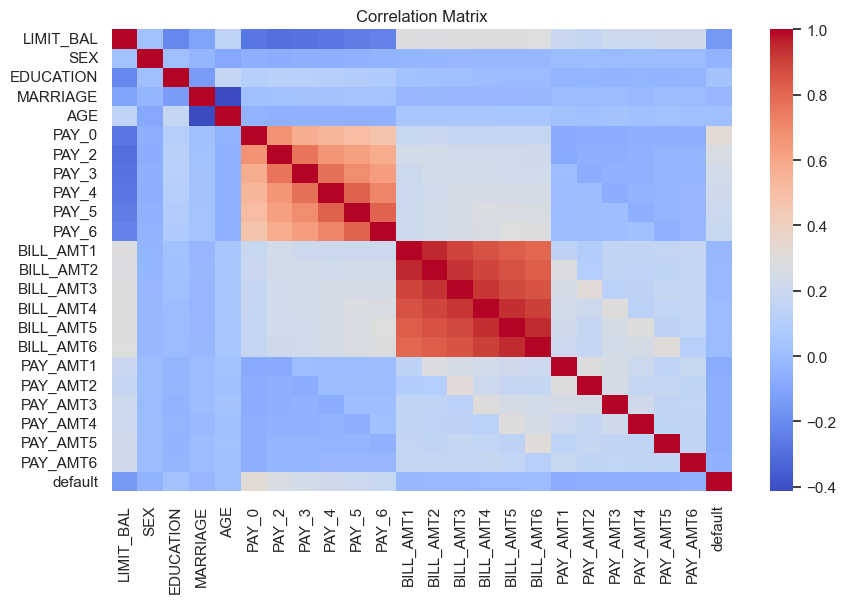

In [9]:
# Correlation heatmap
corr = df.drop(columns=['ID']).corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


### 🔍 Observations
- The dataset is imbalanced with more non-default cases.
- Strong correlations exist between bill and pay amounts.
- Features like `PAY_0`, `LIMIT_BAL` might be important predictors.
- `ID` column can be dropped.
